<a href="https://colab.research.google.com/github/alexsandro-matias/lab_dio/blob/main/aula07_Analise_Explorat%C3%B3ria_no_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória no Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

Forma alternativa de carregar os arquivos.

In [2]:
from google.colab import files
arquivo = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


Criando o Dataframe a partir do arquivo carregado.

In [3]:
df = pd.read_excel("AdventureWorks.xlsx")

In [4]:
df.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
271,2009-10-14,2009-10-25,307,2496,19137,200910145CS727,5.09,9.99,240,0.0,2397.6,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver
542,2009-11-04,2009-11-14,306,1178,19076,200911044CS767,330.66,998.00,4,798.4,3193.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White
160,2008-05-11,2008-05-24,199,1202,18839,200805114CS607,330.66,998.00,12,0.0,11976.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
6,2008-08-14,2008-08-21,307,384,19103,200808143CS628,348.58,758.00,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
255,2008-07-05,2008-07-13,306,2496,19054,200807055CS588,5.09,9.99,120,0.0,1198.8,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver


Neste dataframe, o valor de "**Valor Venda**" já representa o valor de **Receita** representa o valor do produto com o desconto.

A quantidade linhas e colunas do dataframe.

In [5]:
df.shape

(904, 16)

O valor da receita total do dataframe.

In [6]:
df["Valor Venda"].sum()

5984606.1426

Já os tipos de dados que ela contém:

In [7]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

Para saber o curso total, será necessário criar uma coluna chamanda "**Custo**"  para depois fazermos o somatório desses valores.

In [8]:
df["Custo"] = df["Custo Unitário"] * df["Quantidade"]

In [9]:
df["Custo"].head(1)

0    2091.48
Name: Custo, dtype: float64

In [10]:
df["Custo"].sum()

2486783.05

Caso seja necessário arrendondar os valores, usa-se o método **round()**

In [11]:
round(df["Custo"].sum(), 2)

2486783.05

Para se encontrar o lucro deve-se calcular o ***( valor de venda - valor de custo )***

In [12]:
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [13]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


Calculando o lucro total:

In [14]:
round(df["Lucro"].sum(), 2)

3497823.09

Para se calcular o tempo gasto para o envio de um produto, basta subtrair a datas:

In [15]:
df["Data_Envio"] = df["Data Envio"] - df["Data Venda"]

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Data_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


Como a Data_Envio ficou no formato ***(20 days)*** é necessário deixar esse valor como numerico para se determinar, por exemplo o tempo médio de envio. Para isso:

In [17]:
df["Data_Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [18]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Data_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [19]:
df = df.rename(columns={"Data_Envio":"Tempo_Envio_Dias"})

In [20]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio_Dias
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


In [21]:
df.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio_Dias
547,2008-12-16,2008-12-20,306,1202,19060,200812164CS676,330.66,998.0,4,798.4,3193.6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1322.64,1870.96,4


Verificando a alteração:

In [22]:
df["Tempo_Envio_Dias"].dtype

dtype('int64')

Para finalmente o cálculo da média de dias de envio "***por marca***". Para isso, iremos agrupar a marca e depois agrupar novamente pelo tempo de envio, e por último, tirar a média

In [23]:
df.groupby("Marca")["Tempo_Envio_Dias"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio_Dias, dtype: float64

## Para valores faltantes ou nulos

In [24]:
df.isnull().sum()

Data Venda          0
Data Envio          0
ID Loja             0
ID Produto          0
ID Cliente          0
No. Venda           0
Custo Unitário      0
Preço Unitário      0
Quantidade          0
Valor Desconto      0
Valor Venda         0
Produto             0
Fabricante          0
Marca               0
Classe              0
Cor                 0
Custo               0
Lucro               0
Tempo_Envio_Dias    0
dtype: int64

In [25]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

Formatando a saída:

In [26]:
pd.options.display.float_format = '{:20,.2f}'.format 

In [27]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [28]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

Armazenando esses dados num dataframe diferente:

In [31]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()
lucro_ano

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

Porém, não ficou no formato tabular, para corrigir isso, devemos resetar o índice.

In [32]:
lucro_ano.reset_index()

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


Para sabermos o total de produtos vendidos:

In [35]:
df.groupby("Produto")["Quantidade"].sum().sort_values()

Produto
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Black             1089
Headphone Adapter for Contoso Phone E130 White     25008
Headphone Adapter for Contoso Phone E130 Silver    25232
Name: Quantidade, dtype: int64

Invertendo a ordem:

In [36]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Imprimindo o gráfico

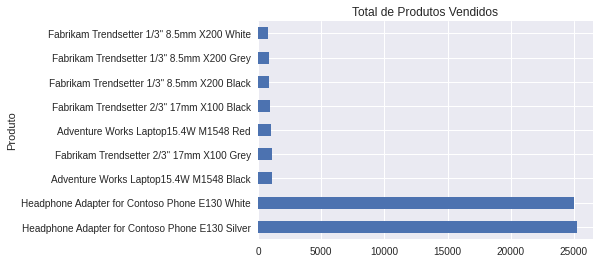

In [38]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).plot.barh(title = "Total de Produtos Vendidos");

Mudando os valores e o tipo do gráfico:

Text(0, 0.5, 'Lucro')

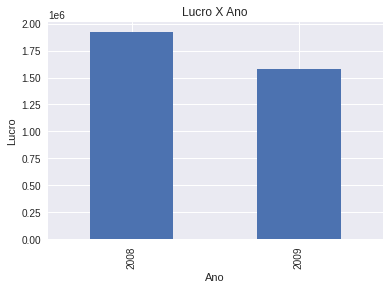

In [43]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro X Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro")

Invertendo a ordem:

Invertendo a ordem:

Invertendo a ordem:

Invertendo a ordem: